## Import libraries

In [1]:
import os
import sys
sys.path.append('..')
import itertools
from glob import glob
import torch
from sklearn.metrics import confusion_matrix
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from tqdm import tqdm_notebook
from torch.utils.data import DataLoader
from module.model import GaussianCnnPredictor
from module.tools import get_bbxes, denormalization, draw_bbx
import module.mvtec as mvtec

## Parameter setting

In [135]:
class_name = 'switch'
data_path = '../datasets/minebea'
save_path = '../mvtec_result'
arch = 'resnet18'

## DataLoader

In [136]:
SIZE = 256

train_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=True, resize = (SIZE, SIZE), cropsize = SIZE, ext='.png')
train_dataloader = DataLoader(train_dataset, batch_size=8, pin_memory=True)
test_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=False, resize = (SIZE, SIZE), cropsize = SIZE, ext='.png')
test_dataloader = DataLoader(test_dataset, batch_size=8, pin_memory=True)

## Model

In [137]:
model = GaussianCnnPredictor(arch = arch, feature_selection = True, similarity = 0.45)

## Train

In [138]:
model.fit(train_dataloader)

| feature extraction |:   0%|          | 0/39 [00:00<?, ?it/s]

fit start


| feature extraction |: 100%|██████████| 39/39 [00:11<00:00,  3.28it/s]


feature extraction done
combined embedding features
embedding_vectors.size: torch.Size([308, 448, 64, 64])


  3%|▎         | 104/4096 [00:00<00:03, 1037.86it/s]

number of features: 115
selected embedding features
got embedding


100%|██████████| 4096/4096 [00:03<00:00, 1048.71it/s]


## Predict

In [139]:
heatmaps = model.predict(test_dataloader)

| feature extraction |:   0%|          | 0/116 [00:00<?, ?it/s]

predict start


| feature extraction |: 100%|██████████| 116/116 [00:35<00:00,  3.25it/s]


feature extraction done
combined embedding features
embedding_vectors.size: torch.Size([922, 448, 64, 64])


  0%|          | 0/4096 [00:00<?, ?it/s]

selected embedding features
got embedding


100%|██████████| 4096/4096 [03:24<00:00, 19.99it/s]


got distances
dist_list.shape: (922, 64, 64)
score_map.shape: (922, 256, 256)


## Show results

In [140]:
test_imgs, labels = [], []
for (x, y) in tqdm_notebook(test_dataloader):
    test_imgs.extend(x.cpu().detach().numpy())
    labels.append(y.cpu().detach().numpy().tolist())
labels = list(itertools.chain.from_iterable(labels))

<ipython-input-140-635781d5ffe0>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for (x, y) in tqdm_notebook(test_dataloader):


  0%|          | 0/116 [00:00<?, ?it/s]

In [161]:
binaries, bbxes, judges = get_bbxes(heatmaps, 30, 2)
print(confusion_matrix(labels, judges))
print(precision_score(labels, judges))
print(recall_score(labels, judges))

[[  0   0]
 [ 17 905]]
1.0
0.9815618221258134


1


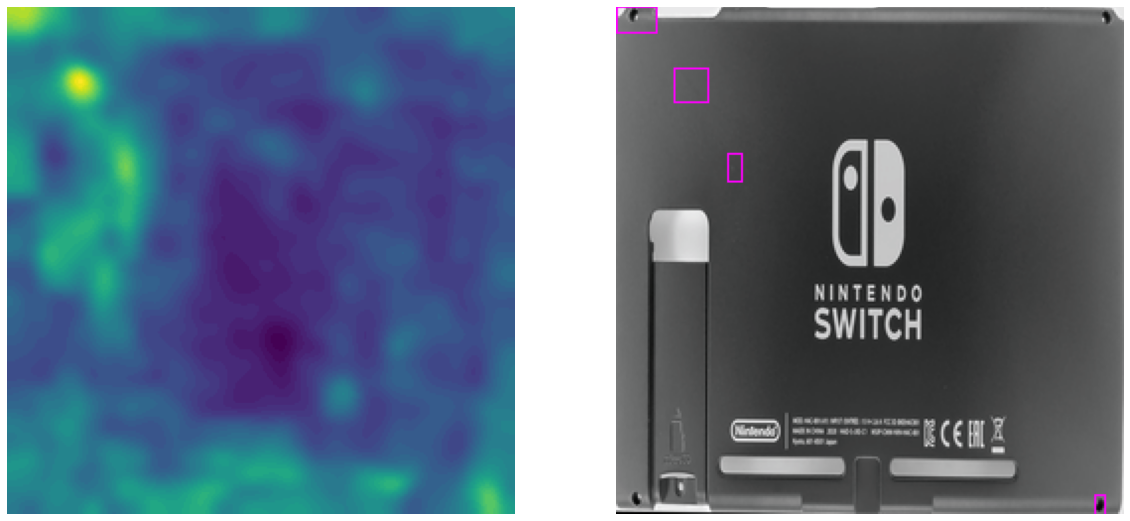

In [230]:
n = 95
img = test_imgs[n]
img = denormalization(img)
c_img = draw_bbx(img, bbxes[n])
plt.figure(figsize=(20,20))

print(labels[n])
# plt.subplot(3, 1, 1), plt.axis('off'), plt.imshow(img)
plt.subplot(1, 2, 1), plt.axis('off'), plt.imshow(heatmaps[n])
plt.subplot(1, 2, 2), plt.axis('off'), plt.imshow(c_img)
plt.show()

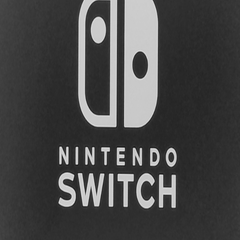

In [223]:
from torchvision import transforms as T
from PIL import Image
resize = (560, 560)
cropsize = 240
path = '/home/daisuke/gaussian-cnn-anomaly-detection/datasets/minebea/switch/train/good/N0188.png'
x = Image.open(path).convert('RGB')
a = T.Resize(resize, Image.ANTIALIAS)
b = T.CenterCrop(cropsize)
b(a(x))

In [224]:
GPUなしでどの程度でるか

NameError: name 'GPUなしでどの程度でるか' is not defined